<a href="https://colab.research.google.com/github/adambartlettds/My_Portfolio_Website/blob/main/Farm%20Animal%20Image%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
(Path(root_path)/'Farm_Animals').mkdir(parents=True, exist_ok=True)


In [ ]:
proj_path = 'gdrive/My Drive/AI_Projects/Farm_Animals/'

In [ ]:
folders = ['cow', 'pig', 'horse' ]


In [ ]:
for i in folders:
 path = Path(proj_path)
 dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
p_path = Path(proj_path)

In [ ]:
np.random.seed(42)


In [ ]:
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['cow', 'horse', 'pig']

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cow', 'horse', 'pig'], 3, 199, 49)

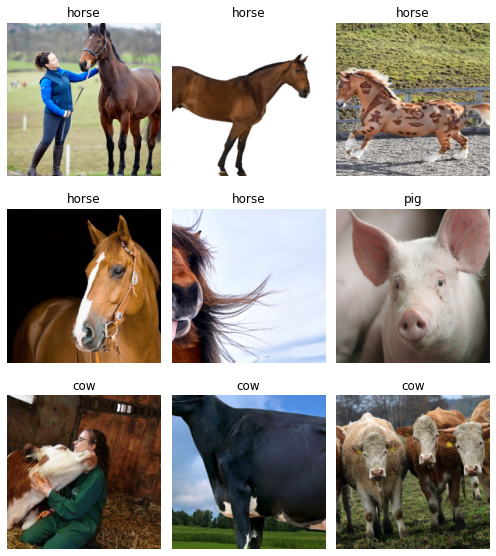

In [ ]:
data.show_batch(rows=3,figsize=(7,8))


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(8)


epoch,train_loss,valid_loss,error_rate,time
0,1.778289,0.990925,0.326531,00:21
1,1.255118,0.294664,0.122449,00:21
2,0.897163,0.248311,0.061225,00:22
3,0.688964,0.227711,0.061225,00:20
4,0.553847,0.224457,0.061225,00:21
5,0.460224,0.218781,0.061225,00:22
6,0.389091,0.211378,0.061225,00:22
7,0.337102,0.209884,0.061225,00:21


In [ ]:
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Farm_Animals/models/model1_34.pth')

In [ ]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


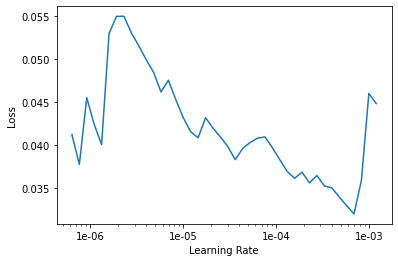

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.047831,0.210153,0.061225,00:21
1,0.055396,0.211584,0.061225,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


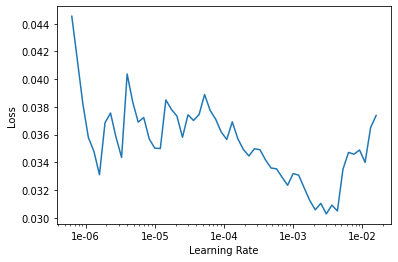

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')


In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

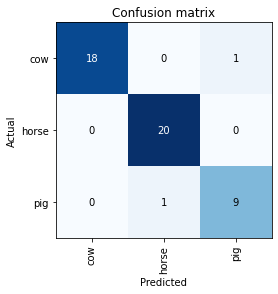

In [ ]:
interp.plot_confusion_matrix()


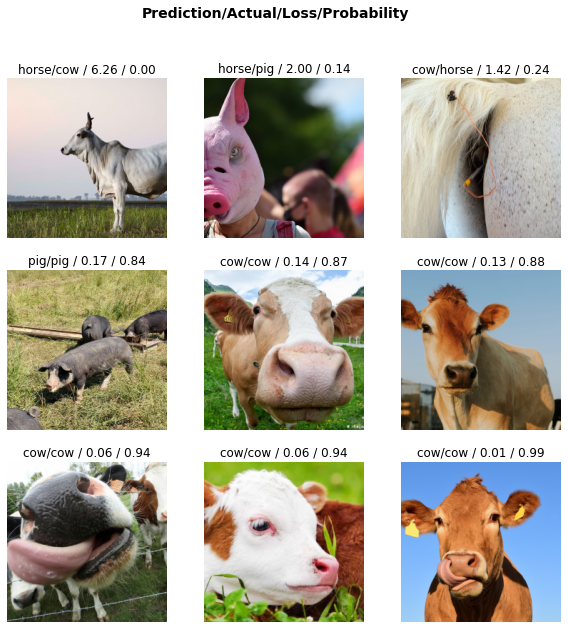

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0" # install to avoid this error /usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 




     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 4.0 MB 22.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.
